In [3]:
import pandas as pd

# Define the file path
file_path = r"C:\Users\skbij\Documents\GitHub\aai-500-final-project-team-5\data\student_preprocessed.csv"

# Read the CSV file
student_df = pd.read_csv(file_path)

# Display first few rows
print(student_df.head())
# (Optional) Display info about the dataset
student_df.info()

print(student_df.shape)
print(student_df.head())
print(student_df.columns.tolist())
student_df.columns
summerize = student_df.describe()
print(summerize)

   school  sex  age  address  famsize  Pstatus  Medu  Fedu     Mjob      Fjob  \
0       1    0   18        1        1        0     4     4  at_home   teacher   
1       1    0   17        1        1        1     1     1  at_home     other   
2       1    0   15        1        0        1     1     1  at_home     other   
3       1    0   15        1        1        1     4     2   health  services   
4       1    0   16        1        1        1     3     3    other     other   

   ... famrel freetime  goout  Dalc  Walc  health  absences  G1  G2  G3  
0  ...      4        3      4     1     1       3         4   0  11  11  
1  ...      5        3      3     1     1       3         2   9  11  11  
2  ...      4        3      2     2     3       3         6  12  13  12  
3  ...      3        2      2     1     1       5         0  14  14  14  
4  ...      4        3      2     1     2       5         0  11  13  13  

[5 rows x 33 columns]
<class 'pandas.core.frame.DataFrame'>
RangeInd

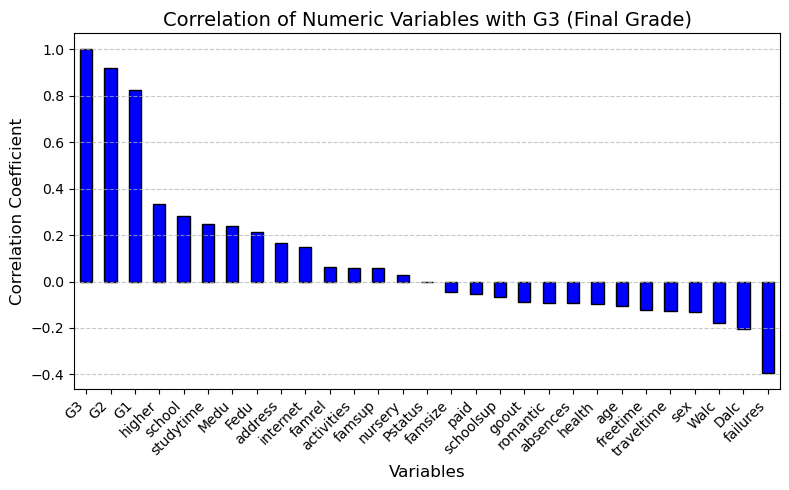

In [9]:
# Run correlation analysis (quantitative features vs grades).
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import seaborn as sns
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from scipy.stats import lognorm, shapiro, norm
import pandas as pd
# Select numeric columns
numeric_df = student_df.select_dtypes(include=['number'])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Extract correlations with G3
corr_with_G3 = corr_matrix['G3'].sort_values(ascending=False)

# Plot
plt.figure(figsize=(8, 5))
corr_with_G3.plot(kind='bar', color='blue', edgecolor='black')

plt.title('Correlation of Numeric Variables with G3 (Final Grade)', fontsize=14)
plt.ylabel('Correlation Coefficient', fontsize=12)
plt.xlabel('Variables', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# Descriptive statistics
desc = df.groupby('race')['ideology'].describe()
print("\nDescriptive Statistics by Group:\n", desc)

# One-way ANOVA
model = ols('ideology ~ C(race)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("\nANOVA Table:\n", anova_table)

# Tukey HSD for pairwise comparisons
tukey = pairwise_tukeyhsd(endog=df['ideology'], groups=df['race'], alpha=0.05)
print("\nTukey HSD Pairwise Comparison Results:\n", tukey)

# Boxplot
plt.figure(figsize=(8,6))
sns.boxplot(x='race', y='ideology', data=df, palette='Set2')
plt.title('Political Ideology by race', fontsize=14)
plt.ylabel('Ideology Score')
plt.xlabel('Race')
plt.show()

In [15]:
import pandas as pd
import numpy as np
from scipy.stats import pointbiserialr, f_oneway
 
# Identify categorical variables
categorical_cols = student_df.select_dtypes(include=['object']).columns

results = []

for col in categorical_cols:
    unique_vals = student_df[col].dropna().unique()
    
    # Binary variable → Point-biserial correlation
    if len(unique_vals) == 2:
        mapping = {val: i for i, val in enumerate(unique_vals)}
        student_df[f"{col}_num"] = student_df[col].map(mapping)
        corr, pval = pointbiserialr(df[f"{col}_num"], df['G3'])
        results.append({'Variable': col, 'Type': 'Binary', 'Correlation': corr, 'p-value': pval})
    
    # Multi-category variable → Eta-squared (effect size from ANOVA)
    elif len(unique_vals) > 2:
        groups = [student_df.loc[student_df[col] == val, 'G3'].dropna() for val in unique_vals]
        f_stat, pval = f_oneway(*groups)
        # Compute eta-squared
        ss_between = sum(len(g) * (g.mean() - student_df['G3'].mean())**2 for g in groups)
        ss_total = sum((student_df['G3'] - student_df['G3'].mean())**2)
        eta_sq = ss_between / ss_total if ss_total != 0 else np.nan
        results.append({'Variable': col, 'Type': 'Categorical', 'Correlation': eta_sq, 'p-value': pval})

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Sort by absolute strength of correlation
results_df['|Correlation|'] = results_df['Correlation'].abs()
results_df = results_df.sort_values(by='|Correlation|', ascending=False)

print("📊 Strength of association between categorical variables and G3:")
print(results_df[['Variable', 'Type', 'Correlation', 'p-value']])


📊 Strength of association between categorical variables and G3:
   Variable         Type  Correlation   p-value
2    reason  Categorical     0.045498  0.000001
0      Mjob  Categorical     0.043774  0.000008
1      Fjob  Categorical     0.019922  0.011376
3  guardian  Categorical     0.008102  0.072262


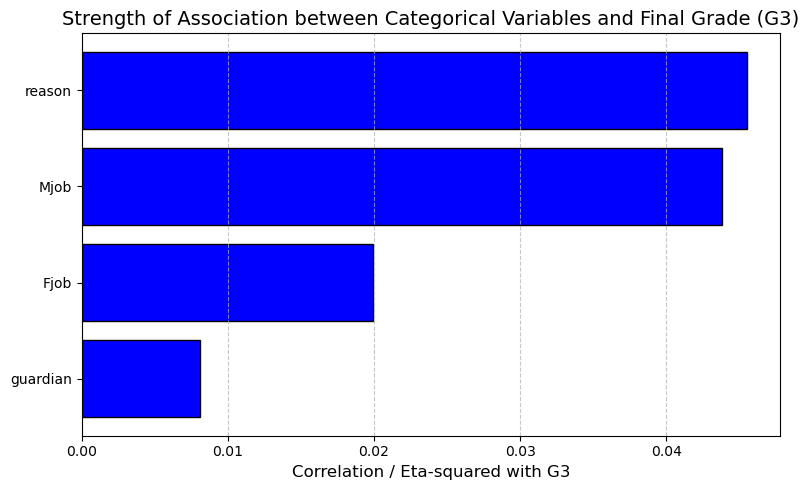

In [16]:

# --- Visualization ---
plt.figure(figsize=(8, 5))
plt.barh(results_df['Variable'], results_df['Correlation'], color='blue', edgecolor='black')
plt.xlabel('Correlation / Eta-squared with G3', fontsize=12)
plt.title('Strength of Association between Categorical Variables and Final Grade (G3)', fontsize=14)
plt.gca().invert_yaxis()  # Highest correlation on top
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

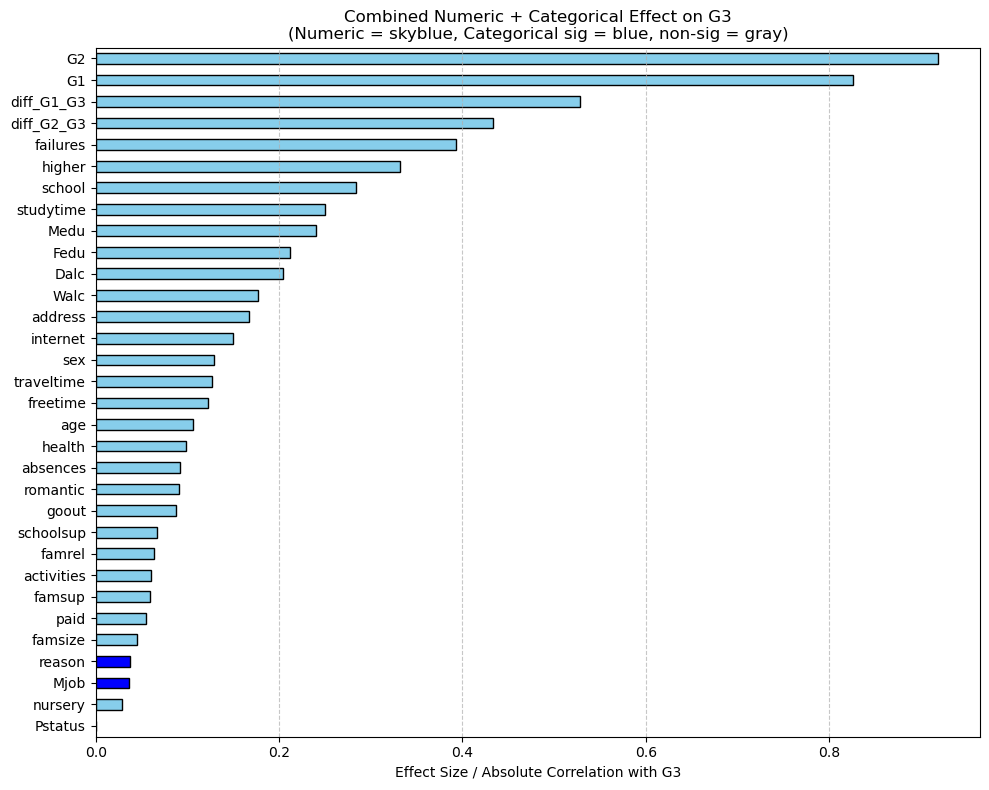

C:\Users\skbij\AppData\Local\Temp\ipykernel_24024\2115937747.py:108: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_subset = df[(student_df['G3'] >=5)]


(633, 44)
['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3', 'diff_G1_G3', 'diff_G2_G3', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_home', 'reason_other', 'reason_reputation', 'guardian_mother', 'guardian_other']
           school         sex         age     address     famsize     Pstatus  \
count  633.000000  633.000000  633.000000  633.000000  633.000000  633.000000   
mean     0.665087    0.406003   16.720379    0.704581    0.699842    0.876777   
std      0.472333    0.491473    1.214044    0.456592    0.458689    0.328953   
min      0.000000    0.000000   15.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000   16.000000    0.000000 

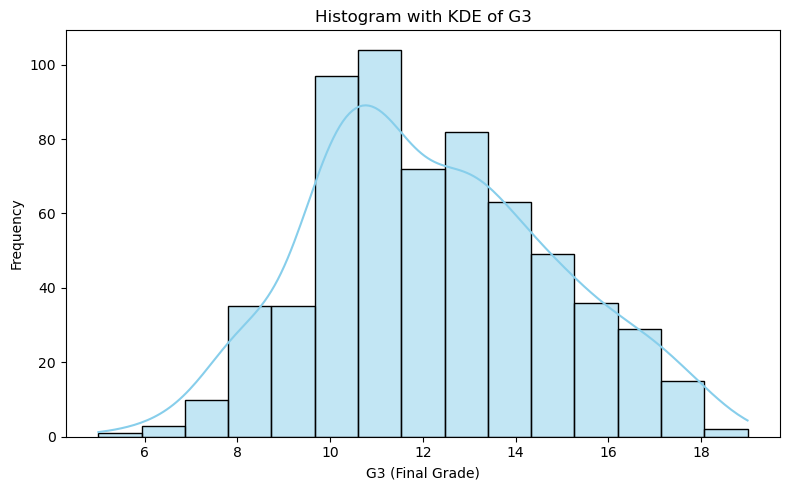

Model formula: G3 ~ age + studytime + absences + G1 + G2 + traveltime + studytime + failures + schoolsup + famsup + paid + activities + nursery + higher + internet + romantic + famrel + freetime + goout + Dalc + Walc + health + C(school) + C(sex) + C(address) + C(famsize) + C(Mjob_health) + C(Mjob_services) + C(Mjob_teacher) + C(reason_home) + C(reason_reputation)
['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3', 'diff_G1_G3', 'diff_G2_G3', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_home', 'reason_other', 'reason_reputation', 'guardian_mother', 'guardian_other']
                            OLS Regression Results                            
Dep. Variable:         

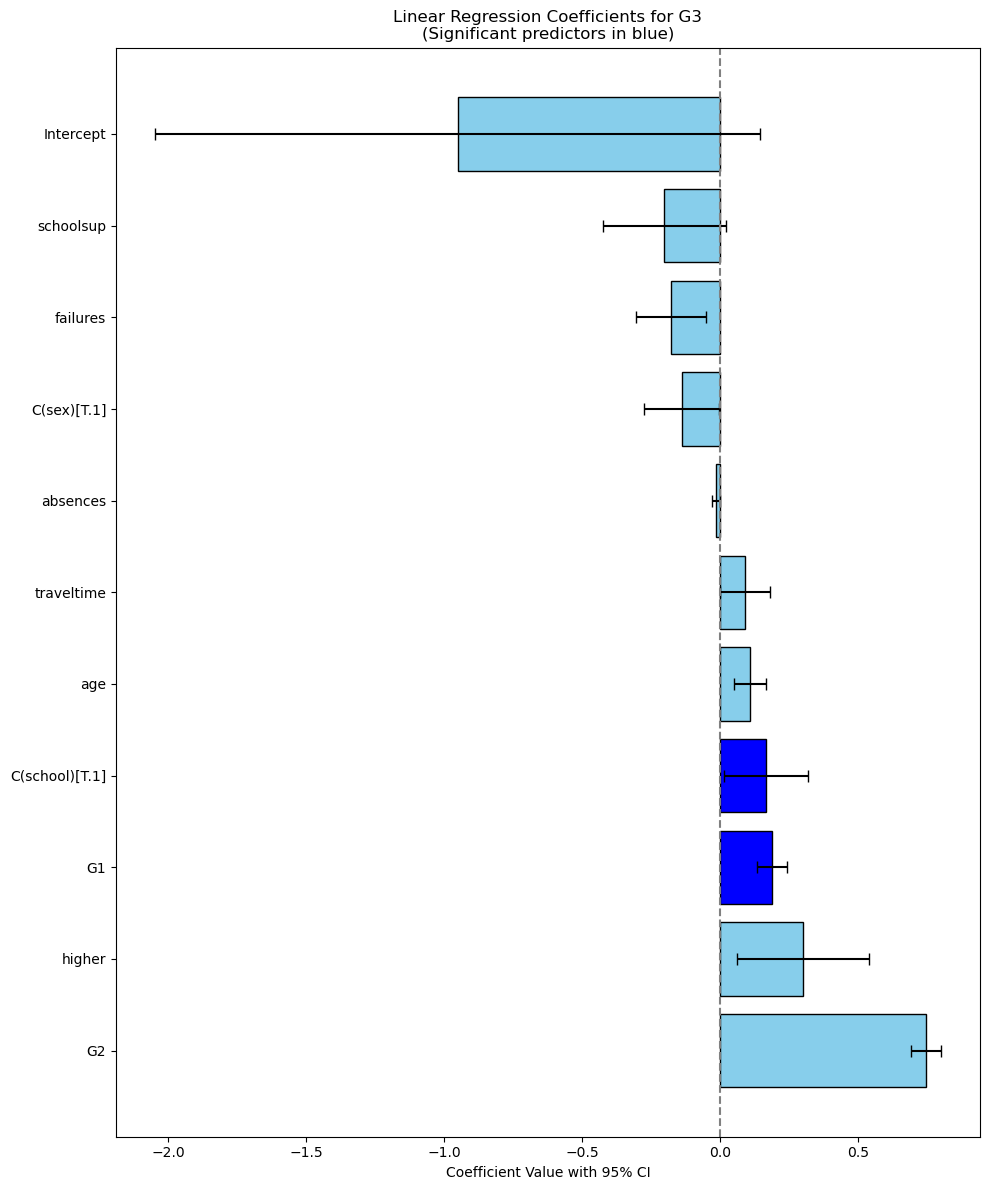

In [63]:
import pandas as pd
import numpy as np
from scipy.stats import pointbiserialr
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
from scipy import stats
from io import StringIO
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# ----------------------------
# 1️⃣ Numeric variables: Pearson correlation with G3
# ----------------------------
numeric_cols = student_df.select_dtypes(include=['number']).columns.tolist()
numeric_cols.remove('G3')  # exclude target

numeric_corr = student_df[numeric_cols + ['G3']].corr()['G3'].drop('G3')
numeric_corr = numeric_corr.abs()  # take absolute value for ranking

# ----------------------------
# 2️⃣ Categorical variables: Stepwise ANOVA + Eta-squared
# ----------------------------
categorical_cols = student_df.select_dtypes(include=['object']).columns.tolist()

# Stepwise ANOVA selection
selected_vars = []
remaining_vars = categorical_cols.copy()
alpha_enter = 0.05
alpha_remove = 0.10
improved = True

while improved:
    improved = False
    
    # Forward
    forward_pvals = {}
    for var in remaining_vars:
        formula = f"G3 ~ {' + '.join(selected_vars + [var])}" if selected_vars else f"G3 ~ {var}"
        model = ols(formula, data=student_df).fit()
        anova_table = sm.stats.anova_lm(model, typ=2)
        forward_pvals[var] = anova_table.loc[var, 'PR(>F)']
    
    if forward_pvals:
        best_var = min(forward_pvals, key=forward_pvals.get)
        if forward_pvals[best_var] < alpha_enter:
            selected_vars.append(best_var)
            remaining_vars.remove(best_var)
            improved = True
    
    # Backward
    if selected_vars:
        formula = f"G3 ~ {' + '.join(selected_vars)}"
        model = ols(formula, data=student_df).fit()
        anova_table = sm.stats.anova_lm(model, typ=2)
        for var in selected_vars.copy():
            pval = anova_table.loc[var, 'PR(>F)']
            if pval > alpha_remove:
                selected_vars.remove(var)
                remaining_vars.append(var)
                improved = True

# Final ANOVA model
final_formula = f"G3 ~ {' + '.join(selected_vars)}"
final_model = ols(final_formula, data=student_df).fit()
anova_table = sm.stats.anova_lm(final_model, typ=2)

# Eta-squared for categorical variables
eta_squared = anova_table['sum_sq'] / sum(anova_table['sum_sq'])
eta_squared = eta_squared.drop('Residual')
categorical_effects = eta_squared.abs()

# ----------------------------
# 3️⃣ Combine numeric + categorical
# ----------------------------
combined = pd.concat([numeric_corr, categorical_effects])
combined = combined.sort_values(ascending=True)  # ascending for horizontal bar chart

# Colors: numeric = skyblue, categorical significant = blue, categorical non-sig = gray
colors = []
for var in combined.index:
    if var in numeric_corr.index:
        colors.append('skyblue')
    else:
        pval = anova_table.loc[var, 'PR(>F)']
        colors.append('blue' if pval < 0.05 else 'lightgray')

# ----------------------------
# 4️⃣ Plot
# ----------------------------
plt.figure(figsize=(10, 8))
combined.plot(kind='barh', color=colors, edgecolor='black')
plt.xlabel('Effect Size / Absolute Correlation with G3')
plt.title('Combined Numeric + Categorical Effect on G3\n(Numeric = skyblue, Categorical sig = blue, non-sig = gray)')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# As discussed; we can remove outliers in the response variables and then run linear regression
# Remove Outliers

# 3) Remove Grade score <5

df_subset = df[(student_df['G3'] >=5)]
print(df_subset.shape)
print(df_subset.columns.tolist()) 
summerize = df_subset.describe()
print(summerize)


# 2. Distributions & Skewness of Continuous Variables
plt.figure(figsize=(8, 5))
sns.histplot(df_subset['G3'], kde=True, bins=15, color='skyblue', edgecolor='black')
plt.title('Histogram with KDE of G3')
plt.xlabel('G3 (Final Grade)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

#========================================================================

categorical_vars = ['school', 'sex', 'address', 'famsize', 'Mjob_health', 'Mjob_services', 'Mjob_teacher', 'reason_home', 'reason_reputation']
continuous_vars = ['age', 'studytime', 'absences', 'G1', 'G2',  'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 
    'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health'
]

formula = 'G3 ~ ' + ' + '.join(continuous_vars + [f'C({var})' for var in categorical_vars])
print("Model formula:", formula)

print(df_subset.columns.tolist())

model = smf.ols(formula=formula, data=df_subset).fit()
print(model.summary())

# Coefficients with 95% confidence intervals
conf_int = model.conf_int()
conf_int.columns = ['CI_lower', 'CI_upper']
coef_df = conf_int.copy()
coef_df['coef'] = model.params
coef_df = coef_df.sort_values(by='coef', ascending=False)
print("\nCoefficients with 95% CI:")
print(coef_df)

# Model performance metrics
from sklearn.metrics import mean_squared_error, r2_score
y_pred = model.predict(X)
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print(f"\nMean Squared Error (MSE): {mse:.2f}")
print(f"R-squared: {r2:.3f}")
  
#========================================= Adjusting some selected significant variables & known predictors ===================================

categorical_vars = ['school','sex']
continuous_vars = ['G1', 'G2', 'age', 'traveltime', 'failures', 'absences', 'higher', 'schoolsup', ]

formula1 = 'G3 ~ ' + ' + '.join(continuous_vars + [f'C({var})' for var in categorical_vars])
print("Model formula:", formula1)

model1 = smf.ols(formula=formula1, data=df_subset).fit()
print(model1.summary())


# Coefficients with 95% confidence intervals
conf_int = model1.conf_int()
conf_int.columns = ['CI_lower', 'CI_upper']
coef_df = conf_int.copy()
coef_df['coef'] = model1.params
coef_df = coef_df.sort_values(by='coef', ascending=False)
print("\nCoefficients with 95% CI:")
print(coef_df)
# Model performance metrics
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model1.predict(X)
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print(f"\nMean Squared Error (MSE): {mse:.2f}")
print(f"R-squared: {r2:.3f}")
  



#====================================================================
 

plt.figure(figsize=(10, 12))
plt.barh(coef_df.index, coef_df['coef'],
         xerr=[coef_df['coef'] - coef_df['CI_lower'], coef_df['CI_upper'] - coef_df['coef']],
         color=colors, edgecolor='black', capsize=4)
plt.axvline(x=0, color='gray', linestyle='--')
plt.xlabel('Coefficient Value with 95% CI')
plt.title('Linear Regression Coefficients for G3\n(Significant predictors in blue)')
plt.tight_layout()
plt.show()


# Next step : May be : We can look restriting by each school 



In [ ]:
print (df_subset)
predictors = ['age', 'studytime', 'absences', 'G1', 'G2', 'traveltime', 'failures',
              'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher',
              'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health',
              'school', 'sex', 'address', 'famsize', 'Mjob', 'Medu', 'Fedu']

# Keep only predictors that exist in df_subset
predictors = [p for p in predictors if p in df_subset.columns]

formula = "G3 ~ " + " + ".join(
    [f"C({p})" if df_subset[p].dtype == "object" else p for p in predictors]
)

print("Final formula used:\n", formula)
model = smf.ols(formula=formula, data=df_subset).fit()
print(model.summary())
# List of predictors
predictors = [
    'school', 'sex', 'age', 'address', 'famsize', 'Medu', 'Fedu', 'Mjob', 'reason', 
    'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 
    'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 

    'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2'
]

# Convert bool to int
df  = df_subset.astype({col: int for col in df_subset.select_dtypes('bool').columns})

# Convert categorical to dummy
df = pd.get_dummies(df_subset, drop_first=True)

# Separate numeric and categorical predictors
numeric_cols = df_subset[predictors].select_dtypes(include=['number']).columns.tolist()
categorical_cols = [col for col in predictors if col not in numeric_cols]


# One-hot encode categorical variables
df_encoded = pd.get_dummies(df_subset[categorical_cols], drop_first=True)

# Combine numeric + encoded categorical predictors
X = pd.concat([df_subset[numeric_cols], df_encoded], axis=1)
y = df_subset['G3']
#Step 2: Fit Linear Regression
print(X.dtypes)
# Add constant for intercept
X = sm.add_constant(X)


# Fit linear regression
model = sm.OLS(y, X).fit()
print(model.summary())# Fit the model
model = sm.OLS(y, X).fit()
#Step 3: Output Full Statistics

# Summary of all regression statistics
print(model.summary())


# Create contingency table
table = pd.crosstab(df['school'], df['happiness'])
print("Observed Frequencies:\n", table, "\n")

# Chi-square test
chi2, p, dof, expected = stats.chi2_contingency(table)
print(f"Chi-squared = {chi2:.3f}, df = {dof}, p-value = {p:.4f}\n")

# Expected frequencies
expected_df = pd.DataFrame(expected, index=table.index, columns=table.columns)
print("Expected Frequencies:\n", expected_df.round(2), "\n")

# Standardized residuals = (Observed - Expected) / sqrt(Expected)
std_resid = (table - expected_df) / np.sqrt(expected_df)
print("Standardized Residuals:\n", std_resid.round(2), "\n")



# --- Mosaic plot ---
plt.figure(figsize=(9,6))
mosaic (df, ['gender','happiness'])
plt.title("Mosaic Plot: Happiness vs Gender (Color = Standardized Residuals)", fontsize=14)
plt.xlabel("Gender and Happiness Categories")
plt.show()
Observed Frequencies:
 happiness    1    2    3
gender                  
female     353  642  153
male       295  553  146 

Chi-squared = 0.917, df = 2, p-value = 0.6324

Expected Frequencies:
 happiness       1       2       3
gender                           
female     347.29  640.46  160.25
male       300.71  554.54  138.75 

Standardized Residuals:
 happiness     1     2     3
gender                     
female     0.31  0.06 -0.57
male      -0.33 -0.07  0.62 

<Figure size 900x600 with 0 Axes>


